### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [4]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

los datos que este set son caracterizados por sus componentes como el agua, proteina, lactosa entre otras. Viendo una manera de agrupamiento puede ser los tipo de animales que tengan una leche rica en proteina o algún otro componente. Además se pueden agrupar por tipo de componente y mostrar un resumen con la clusterización.

In [5]:
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85
CAT,81.6,10.1,6.3,4.4,0.75


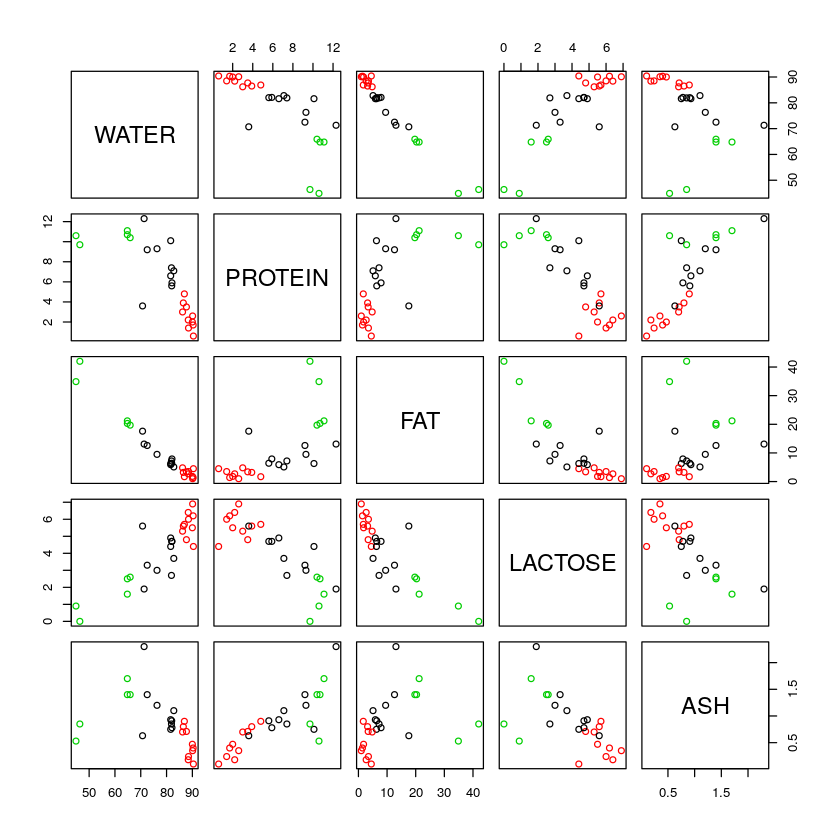

In [6]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 2: Interprete y comente los resultados obtenidos. 

Se muestran en los gráficos los agrupamientos de animales segun los porcentajes de cada componente.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-0.3648022,0.5122745,0.035443118,-0.100811412,-0.003787440
2,1.8760640,-0.2017241,-0.007713097,0.096359085,-0.003291286
3,-3.0225237,-0.6211010,-0.055460042,0.008904655,0.014157452


K-means clustering with 3 clusters of sizes 10, 10, 5

Cluster means:
  WATER PROTEIN   FAT LACTOSE   ASH
1 78.28    7.71  9.16    3.89 1.085
2 88.50    2.57  2.80    5.68 0.485
3 57.36   10.50 27.62    1.52 1.176

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          2          2          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          1          1          1          1          1          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          3 

Within cluster sum of squares by cluster:
[1] 446.58905  59.41225 883.10652
 (between_SS / total_SS =  80.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.wit

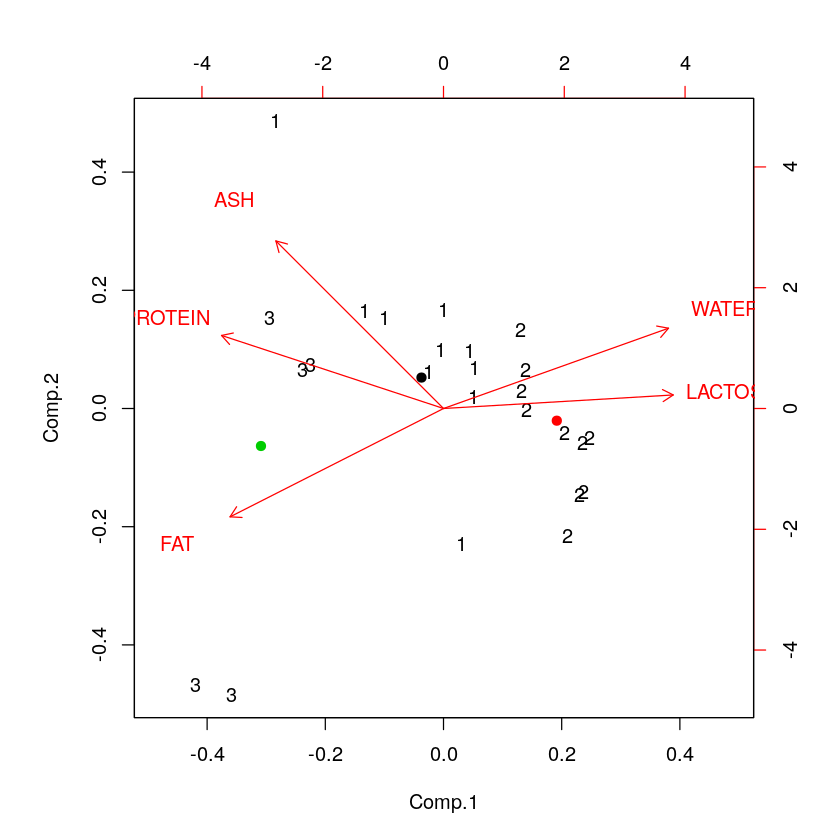

In [8]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

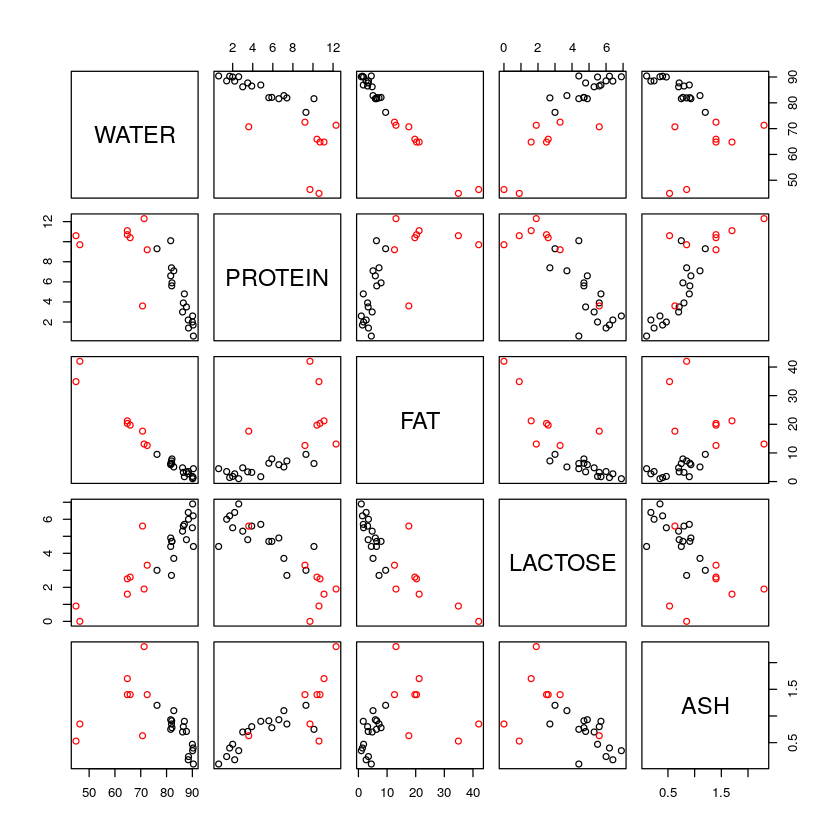

In [9]:
#para 2 grupos
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

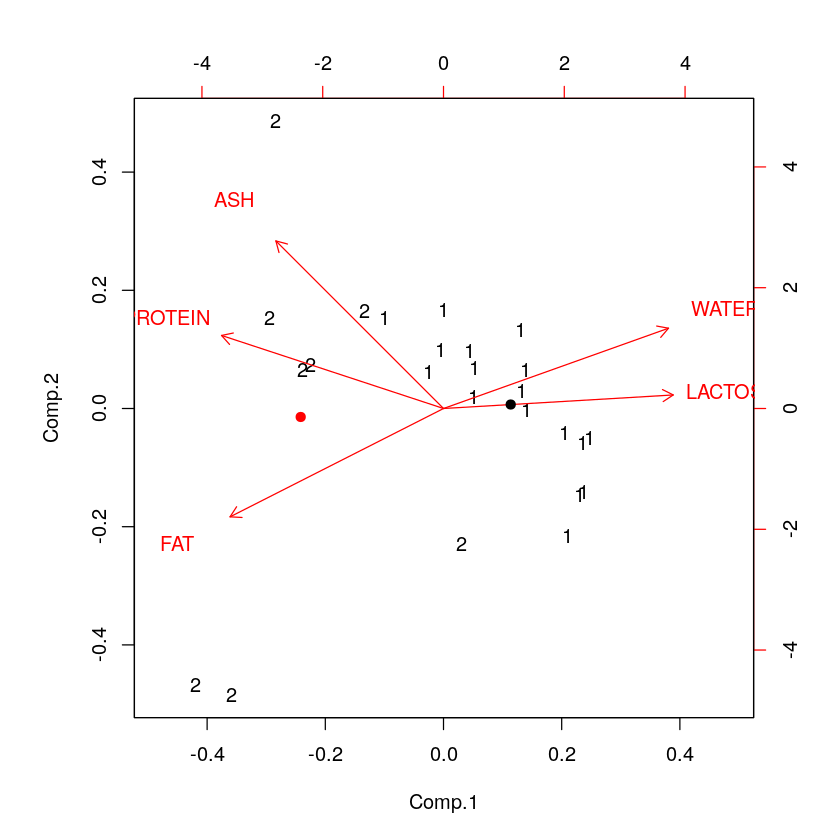

In [10]:
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

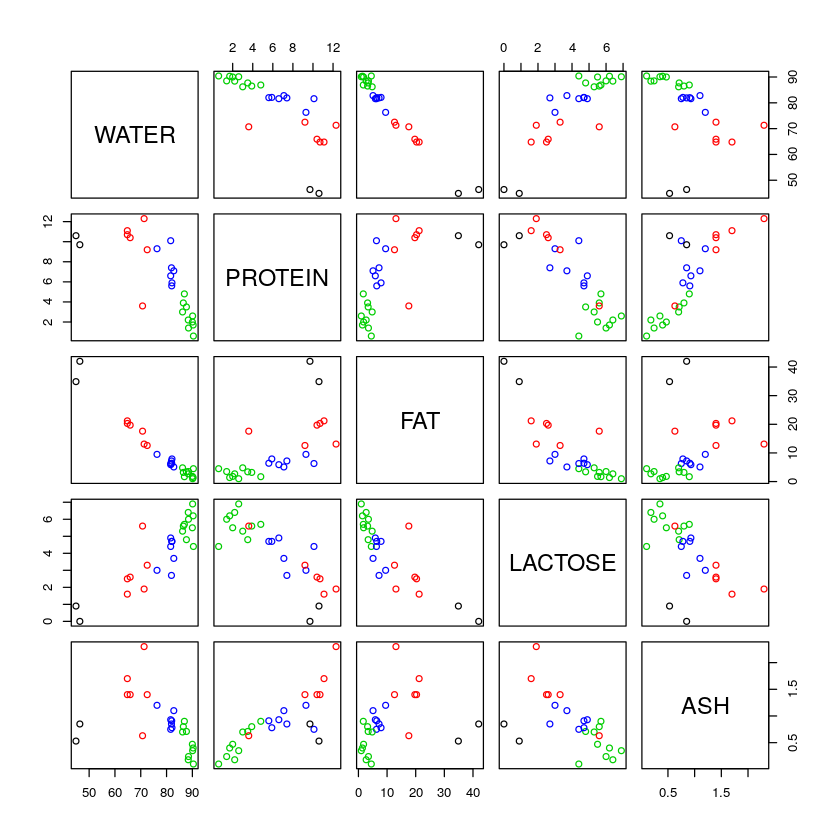

In [11]:
#para 4 grupos
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
2,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
3,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
4,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595


K-means clustering with 4 clusters of sizes 2, 6, 10, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 45.65000 10.150000 38.45000 0.450000 0.6900000
2 68.33333  9.550000 17.41667 2.916667 1.4716667
3 88.50000  2.570000  2.80000 5.680000 0.4850000
4 81.18571  7.428571  6.90000 4.014286 0.9314286

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         4          4          4          4          3          3          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          4          4          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.19120 191.74708  59.41225  63.53491
 (between_SS / tot

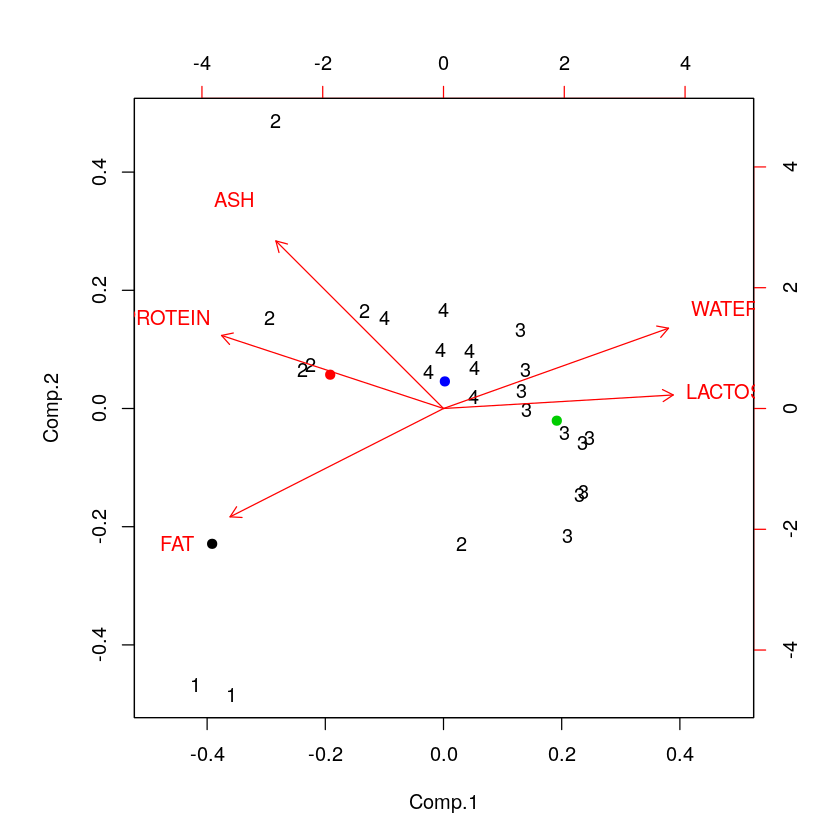

In [12]:
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

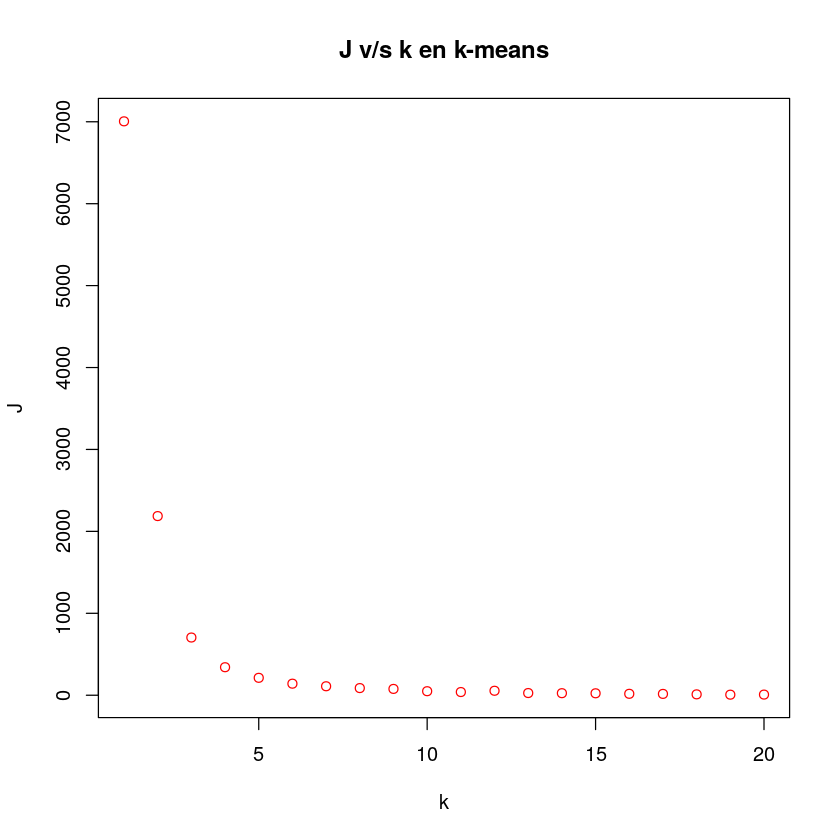

In [13]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

El valor de k más adecuado es el 3 ya que con 2 grupos los datos son muy heterogeneos y con 4 los datos se empiezan a segmentar aun siendo muy parecidos. Si vemos los resultados con 6 grupos sabemos que el cluster queda con grupos muy poco sesgados ya que es dificil hacer agrupamientos si estos datos son parecidos, es decir si el j (suma cuadrado de las distancias) es pequeño.

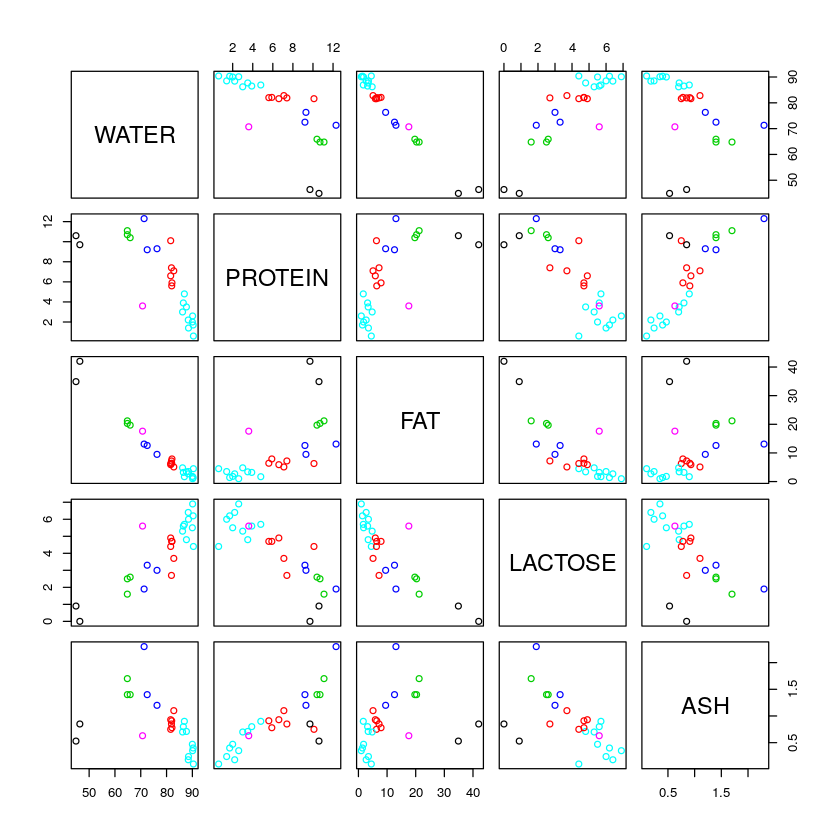

In [15]:
#para 6 grupos
k0=6
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [26]:
datosfc <-read.csv("DatosUsoFacebook.csv",sep=";",header=TRUE)

In [27]:
datosfc

R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
2,2,3,1,2,2,3,3,2,3,4,2,2,2,1,1
3,3,1,1,1,1,1,1,1,3,4,1,2,1,1,1
3,2,2,3,1,4,2,3,1,3,4,2,3,1,2,1
2,3,3,1,2,2,3,3,1,1,4,1,4,1,1,1
2,2,2,2,1,1,1,3,1,1,3,1,4,1,2,1
3,3,2,3,1,1,3,3,1,2,4,1,3,1,1,1
3,3,3,3,1,1,3,3,1,1,4,1,3,1,1,1
1,2,1,3,1,4,3,2,1,1,4,1,2,1,1,1
2,3,3,4,2,1,3,3,1,2,4,1,3,1,1,1
3,2,1,3,1,4,1,2,1,3,4,1,2,1,1,1


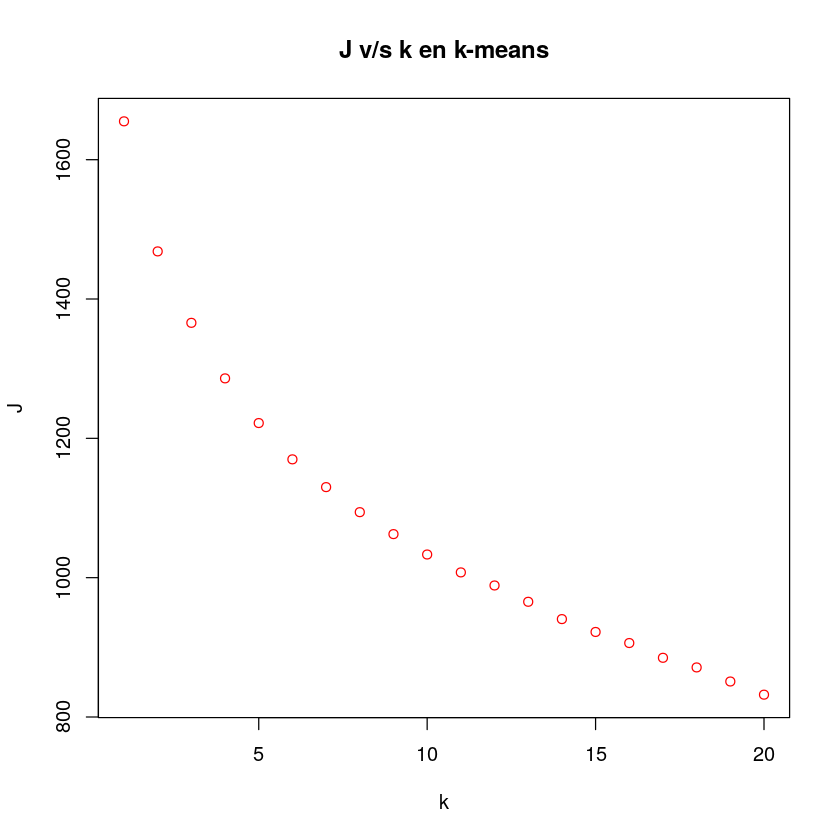

In [57]:
#para ver que k utilizar
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datosfc,k,iter.max=1000000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

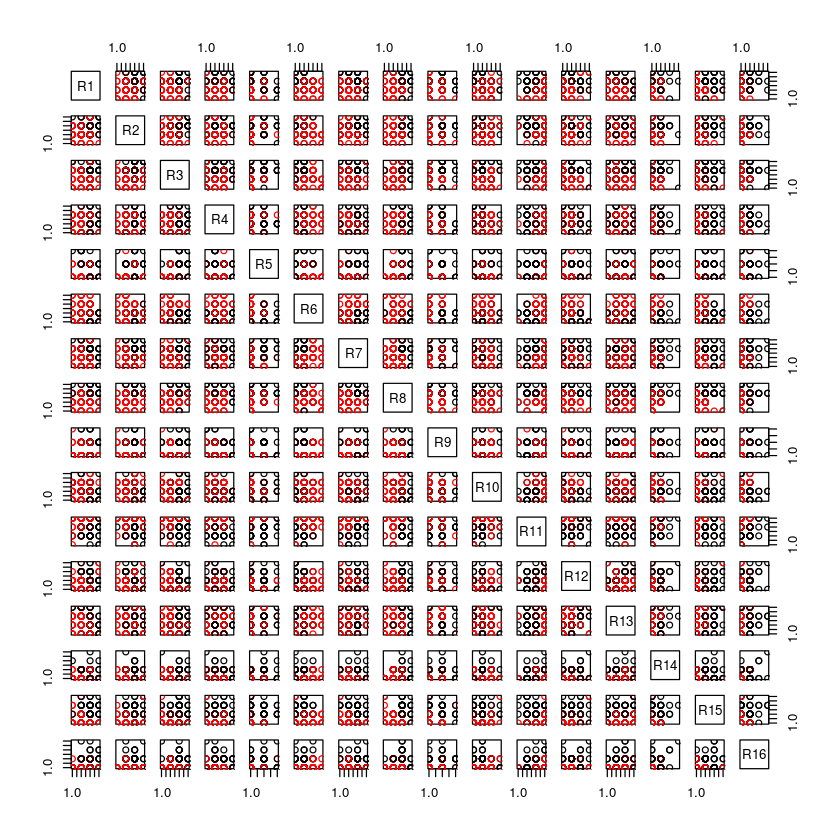

In [54]:
k0=2
cl<-kmeans(datosfc,k0,iter.max=100000,nstart=10)
pairs(datosfc,col=cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-1.328062,-0.3295497,-0.10774395,-0.01720856,-0.1109994,0.1322253,0.03293854,0.10726694,0.01920939,0.09726960,-0.04033920,0.0005672697,0.05703759,0.01369847,-0.01268650,0.02644033
2,1.206097,0.2992849,0.09784909,0.01562818,0.1008056,-0.1200822,-0.02991357,-0.09741589,-0.01744526,-0.08833668,0.03663458,-0.0005151735,-0.05179945,-0.01244045,0.01152141,-0.02401213


K-means clustering with 2 clusters of sizes 89, 98

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.921348 2.842697 2.898876 2.382022 1.494382 1.719101 2.696629 3.011236
2 2.224490 2.387755 2.173469 2.153061 1.214286 2.030612 2.081633 2.306122
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.561798 1.865169 2.898876 1.932584 2.393258 1.438202 2.146067 1.516854
2 1.224490 2.040816 3.632653 1.571429 2.540816 1.234694 1.326531 1.153061

Clustering vector:
  [1] 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 2 1 2 2 1 2 1 1 2 1 2 1
 [38] 2 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 2 1 2 2 1 2 2 2 1 1 1 2 2 2 2 1 2 2 1 2 1
[112] 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 1 2 2 1 2 1 2 1 1 1 1 2 2 2 2 1 1 2 2 1 2
[149] 2 2 2 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1
[186] 2 2

Within cluster sum of squares by cluster:
[1] 699.8202 768

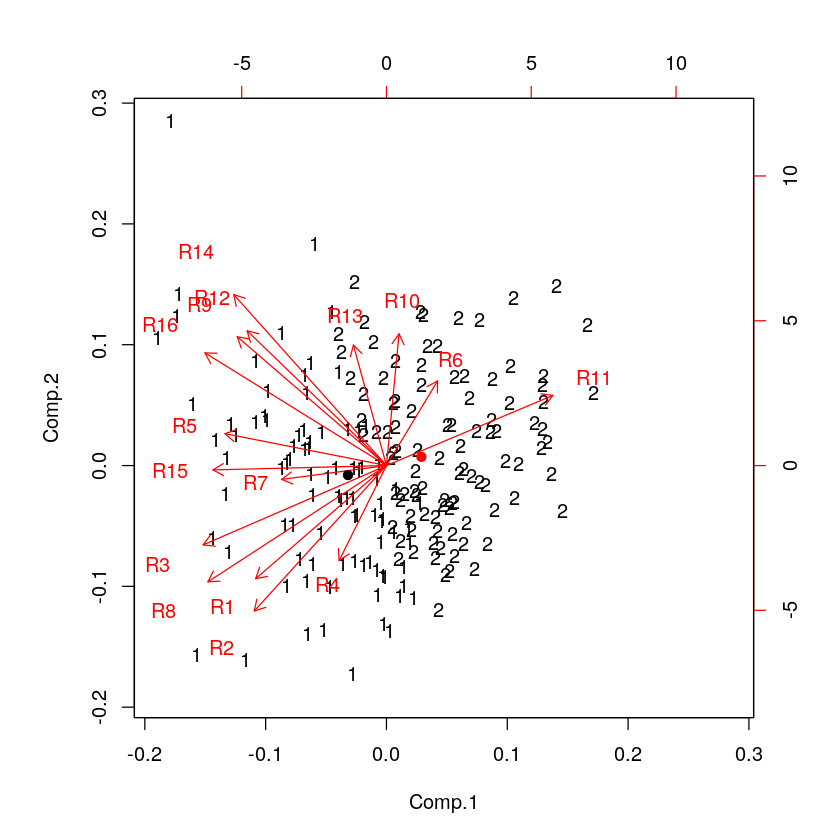

In [55]:
res <- princomp(datosfc, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

Se ve una buena segmentación de grupos con k=2. Podemos ver que R10, R11, R13 y R6 tienen datos que los hace pertenecer a un grupo totalmente separado del resto de R's.